# Modèle ARIMA

Le modèle ARIMA (AutoRegressive Integrated Moving Average) est une méthode couramment utilisée pour modéliser et prévoir les séries temporelles. Il combine les composantes de l'autorégression (AR) et de la moyenne mobile (MA) avec une différenciation (I) pour prendre en compte les tendances et les comportements saisonniers dans les données.

## Composantes du modèle ARIMA

- **AR (Autorégression)** : L'AR fait référence à la régression linéaire des valeurs actuelles sur les valeurs précédentes de la série temporelle. Il capture les effets de dépendance linéaire à partir des valeurs passées.

- **MA (Moyenne mobile)** : Le MA utilise la moyenne mobile des erreurs précédentes pour modéliser la relation entre les résidus et les observations actuelles de la série temporelle. Il capture les effets de dépendance entre les résidus.

- **I (Différenciation)** : La différenciation est utilisée pour rendre les données stationnaires en supprimant les tendances et les comportements saisonniers. Elle consiste à prendre la différence entre les observations consécutives jusqu'à obtenir une série stationnaire.

## Ordres du modèle ARIMA

Le modèle ARIMA est défini par trois ordres : **p, d et q.**

- **p (Ordre AR)** : L'ordre AR spécifie le nombre de termes autorégressifs à inclure dans le modèle. ***Il indique combien de valeurs passées sont utilisées pour prédire la valeur actuelle***.

- **d (Ordre de différenciation)** : L'ordre de différenciation ***indique combien de fois la série doit être différenciée pour rendre les données stationnaires***.

- **q (Ordre MA)** : L'ordre MA spécifie le nombre de termes de la moyenne mobile à inclure dans le modèle. ***Il indique combien de résidus passés sont utilisés pour prédire l'observation actuelle***.




## Méthodologie de Box-Jenkins le modèle ARIMA

La méthodologie de Box-Jenkins est une approche couramment utilisée pour modéliser et prévoir les séries temporelles. Elle comprend les étapes suivantes :

Méthode ARIMA
Dans la méthode ARIMA pour modéliser & prévoir les Séries Temporelles, on utilise la méthodologie Box-Jenkins.

Cette méthodologie comprends trois étapes suivantes :

**1. Identification du modèle** :

- Analyser les données, détecter les tendances ou une saisonnalité;

- Rendre les données stationnaires en appliquant la différenciation;

- Déterminer les ordres p, d et q, à l'aide des graphique ACF (fonction d'autocorrélation) et PACF (fonction autocorrélation partielle)

**2. Estimation du modèle :** MCO(OLS) par exemple pour estimer les paramètres du modèle.

**3. Vérification du modèle**

- Diagnostic du modèle :  vérifier que les résidus du modèle ARIMA sont "bruit blanc" (absence de corrélation significative)

- Ajustement du modèle : si le modèle ne satisfait pas les critères du bruit blanc alors, il faut modifier les valeurs de p, d et q. Puis reprendre les étapes précédentes.

- Validation : effectue des prédictions sur les données de validation en utilisant des métriques comme RMSE(erreur quadratique moyenne) ou AIC (critère d'information AKAIKE)

La méthodologie de Box-Jenkins est itérative, ce qui signifie que les étapes d'identification, d'estimation et de vérification peuvent être répétées plusieurs fois pour améliorer le modèle. L'objectif est de trouver le meilleur modèle ARIMA qui capture les motifs et les caractéristiques importantes de la série temporelle, et qui peut être utilisé pour effectuer des prédictions précises.



# Importation des packages

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
chemin_fichier="E:\Formation_Data_Analystic\Statistique\sda_stat_AQI\df_final_london.csv"
df_initial=pd.read_csv(chemin_fichier)

In [ ]:
df_initial.head(3)

,Date,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,TEMP_MOY,HUMIDITY_MAX_PERCENT,HUMIDITY_EST_AVG,WINDSPEED_MAX_KMH,WINDSPEED_AVG_KMH,PRECIP_TOTAL_DAY_MM,SUNHOUR,...,CLOUDCOVER_AVG_PERCENT,Toluène,Benzène,CO,NO2,SO2,O3,PM2.5,PM10,AQI
0,2024-01-01,10,7,8.00,77,57.75,22,13.2,0.7,1,...,86.500,1.220990,0.557676,173.625000,16.883333,3.025000,54.750000,5.029167,8.579167,21.411284
1,2024-01-02,12,9,10.75,94,70.50,41,24.6,3.3,1,...,92.125,0.798221,0.362716,147.458333,13.370833,2.262500,63.208333,4.125000,6.500000,25.283333
2,2024-01-03,11,10,10.25,75,56.25,28,16.8,0.3,1,...,96.875,0.961362,0.431034,175.041667,17.875000,2.929167,51.000000,5.612500,7.675000,21.110833


In [5]:
# Créer un nouveau df et recuperer que les colonnes Date et AQI

df = df_initial[['Date','PM2.5', 'AQI']]

In [6]:
df.head(3)

,Date,PM2.5,AQI
0,2024-01-01,5.029167,21.411284
1,2024-01-02,4.125000,25.283333
2,2024-01-03,5.612500,21.110833


In [7]:
df.shape

(366, 3)

# Présentation de la problématique et chargement des données

# Description de la base de données la qualité de l'air (AQI)

La base de données AQI regroupe les valeurs sur la qualité de l'air de la ville de Londre en 2024. Elle sera l'objet d'une étude en série temporelle pour comprendre la variation de l'AQI en fonction du temps.


La base de données AQI contient les colonnes suivantes :

- **Date** : La date (jour, mois et année) de chaque observation.
- **AQI** : la concentration de l'air.


In [8]:
# Information sur la base de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    366 non-null    object 
 1   PM2.5   366 non-null    float64
 2   AQI     366 non-null    float64
dtypes: float64(2), object(1)
memory usage: 8.7+ KB


In [ ]:
# Conversion de la date en datetime
from datetime import datetime
df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)

In [10]:
# Verification
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    366 non-null    datetime64[ns]
 1   PM2.5   366 non-null    float64       
 2   AQI     366 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 8.7 KB


In [11]:
# Mettre la date en index de la table
df.set_index('Date',inplace=True)
df.head(3)

,PM2.5,AQI
Date,,
2024-01-01,5.029167,21.411284
2024-01-02,4.125000,25.283333
2024-01-03,5.612500,21.110833


In [ ]:
# Vérification des valeurs manquante
df.isnull().sum()

AQI    0
dtype: int64

# Etape 1: Identification du modèle

### a) Analyse des données

Nous allons visualiser afin de comprendre les tendances, la saisonnalité, stationnarité et d'autres comportements.

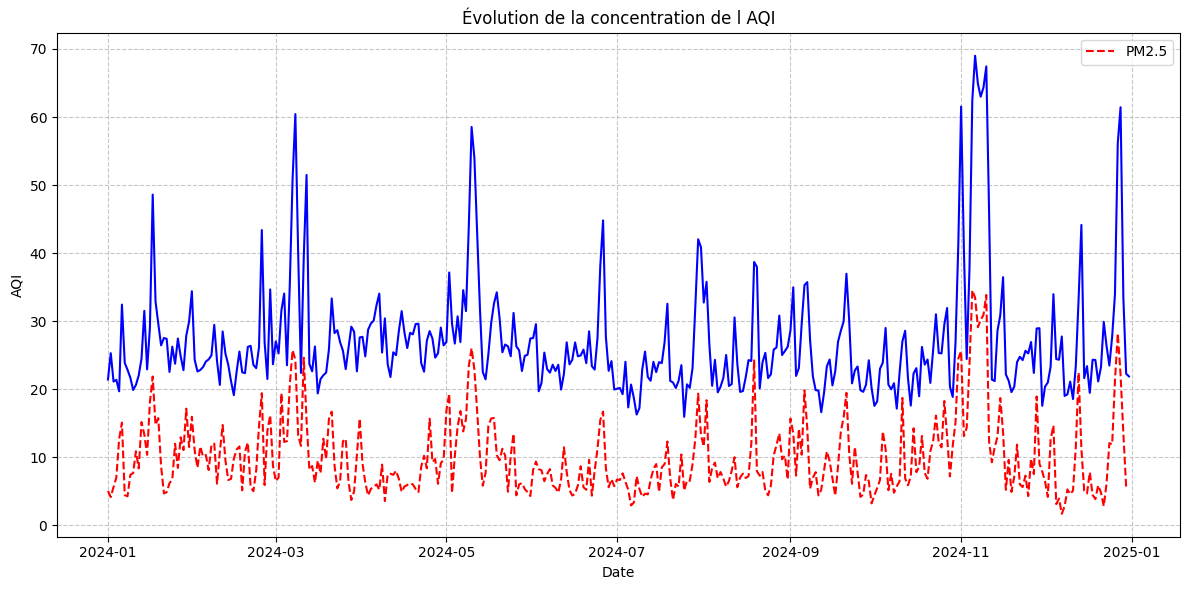

In [ ]:
# Visualisation des Séries temporelles

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['AQI'], color='blue', linewidth=1.5)
plt.plot(df['PM2.5'], label='PM2.5', color='red', linewidth=1.5, linestyle='--')
plt.title('Évolution de la concentration de l AQI')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Visualisation des caractéristiques

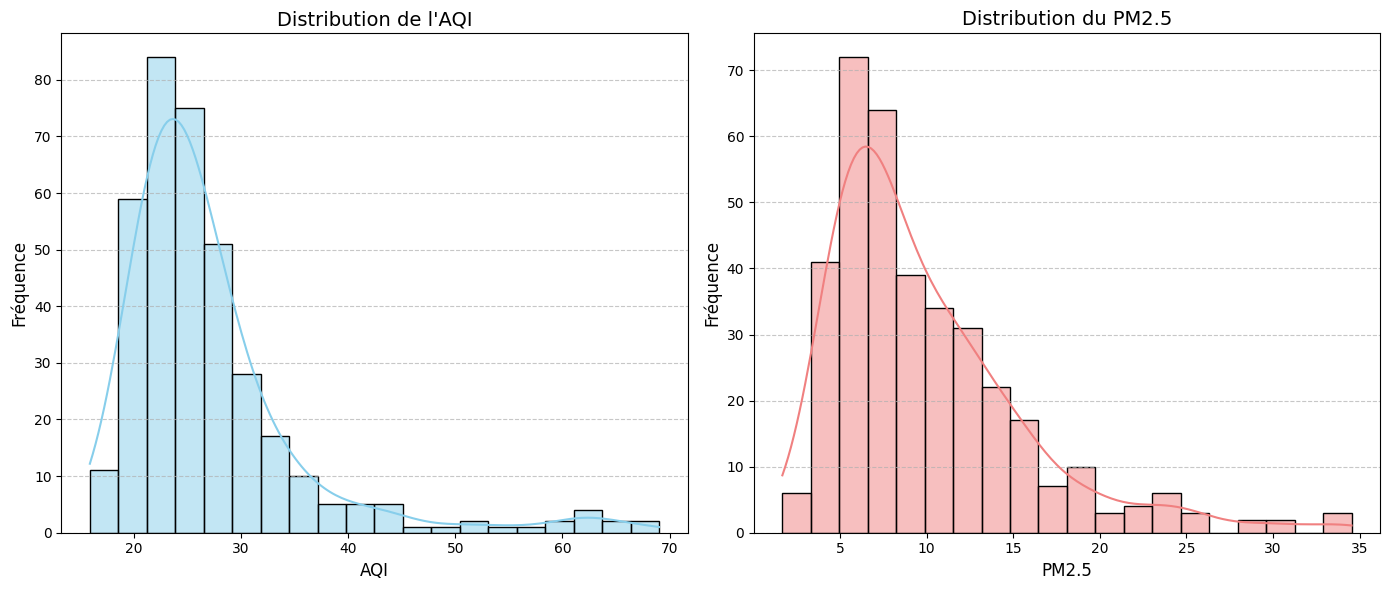

In [25]:


# --- Distribution des valeurs (Histogrammes) ---
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) # 1 ligne, 2 colonnes, premier graphique
sns.histplot(df['AQI'], kde=True, bins=20, color='skyblue')
plt.title('Distribution de l\'AQI', fontsize=14)
plt.xlabel('AQI', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2) # 1 ligne, 2 colonnes, deuxième graphique
sns.histplot(df['PM2.5'], kde=True, bins=20, color='lightcoral')
plt.title('Distribution du PM2.5', fontsize=14)
plt.xlabel('PM2.5', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [26]:
# Statistiques descriptives

print("\nStatistiques descriptives pour l'AQI et le PM2.5 :")
print(df[['AQI', 'PM2.5']].describe())


Statistiques descriptives pour l'AQI et le PM2.5 :
              AQI       PM2.5
count  366.000000  366.000000
mean    27.097212    9.985178
std      8.662264    5.689122
min     15.926389    1.666667
25%     22.232084    5.896875
50%     24.824792    8.239583
75%     28.871615   12.318750
max     69.008472   34.533333


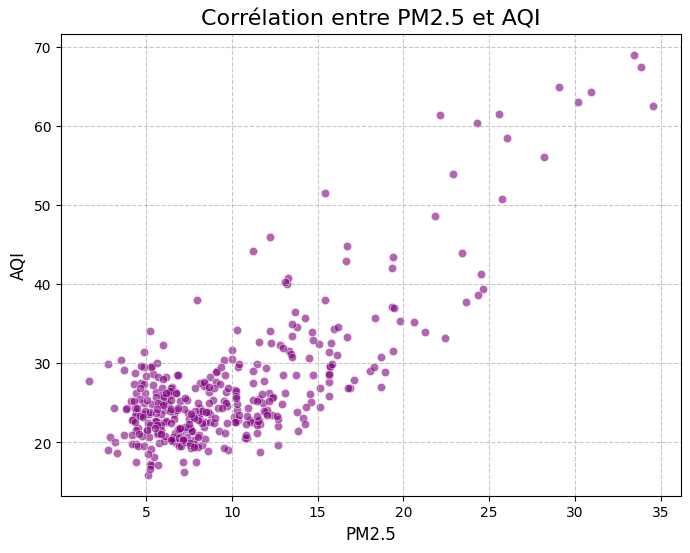


Coefficient de corrélation entre AQI et PM2.5 : 0.783


In [29]:
# Corrélation entre AQI et PM2.5 (Nuage de points et coefficient)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['PM2.5'], y=df['AQI'], alpha=0.6, color='purple')
plt.title('Corrélation entre PM2.5 et AQI', fontsize=16)
plt.xlabel('PM2.5', fontsize=12)
plt.ylabel('AQI', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

correlation = df['AQI'].corr(df['PM2.5'])
print(f"\nCoefficient de corrélation entre AQI et PM2.5 : {correlation:.3f}")

On constate une relation linéaire entre PM2.5 et AQI. Lorsque PM2.5 augmente, l'AQI a tendance à augmenter. De plus, il y 'a une forte corrélation positive, qui entraine que ces deux variables évoluent dans la même direction.

#### Décomposition de la Série Temporelle

Après l'exploration des caractéristiques de base, nous allons procéder à la décomposition des séries temporelles pour AQI et PM2.5 en ses trois composantes :  **Tendance, Saisonnalité et Résidus**

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

**Modèle additif**

**Additif** : Si l'amplitude de la saisonnalité ne change pas avec le niveau de la série. La somme de la Tendance (T), Saisonnalité (S) et Résidus (R)


In [44]:
# Period = 4, par trismestre
# Period = 24, par heure
# periode = 12, par mois
# Periode = 7, par semaine
decomposition_aqi = seasonal_decompose(df['AQI'], model='additive', period=24)

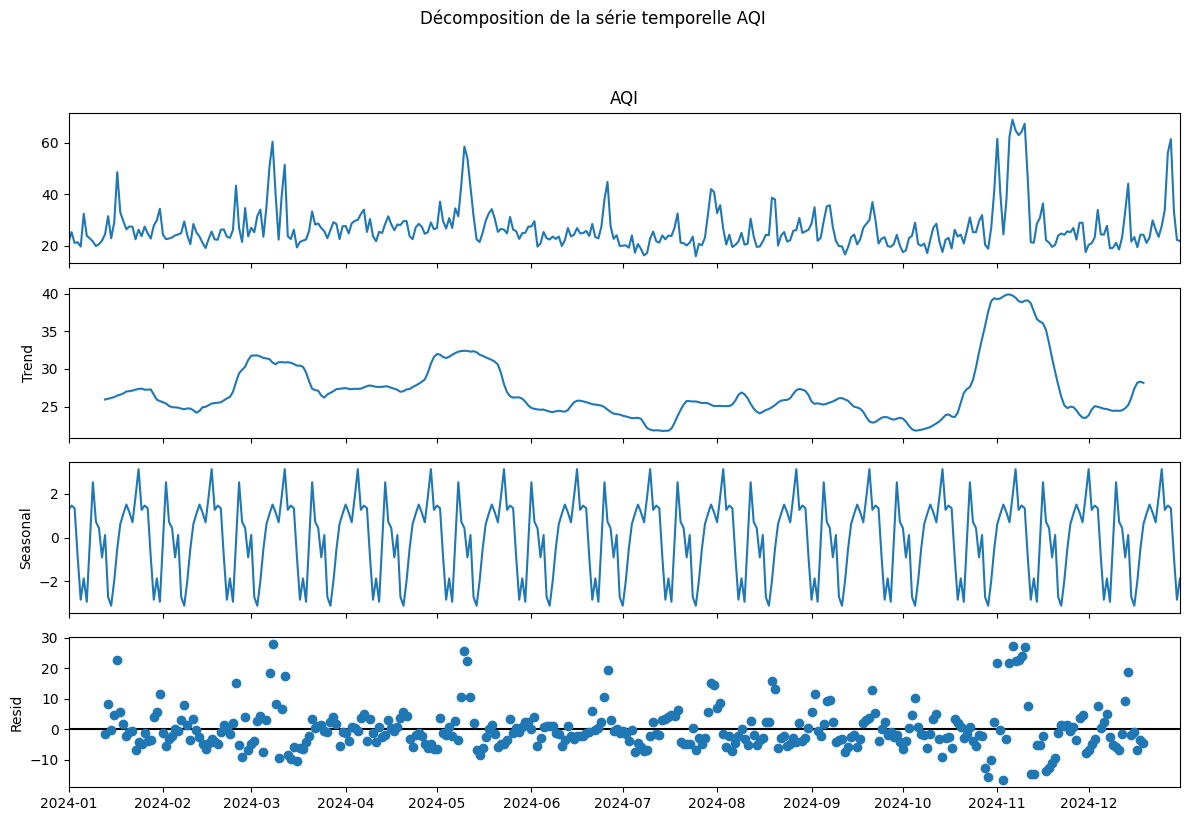

In [45]:
# Visualisation de la décomposition
fig = decomposition_aqi.plot()
fig.set_size_inches(12, 8)
fig.suptitle('Décomposition de la série temporelle AQI ', y=1.02) 
plt.tight_layout(rect=[0, 0, 1, 0.98]) 
plt.show()

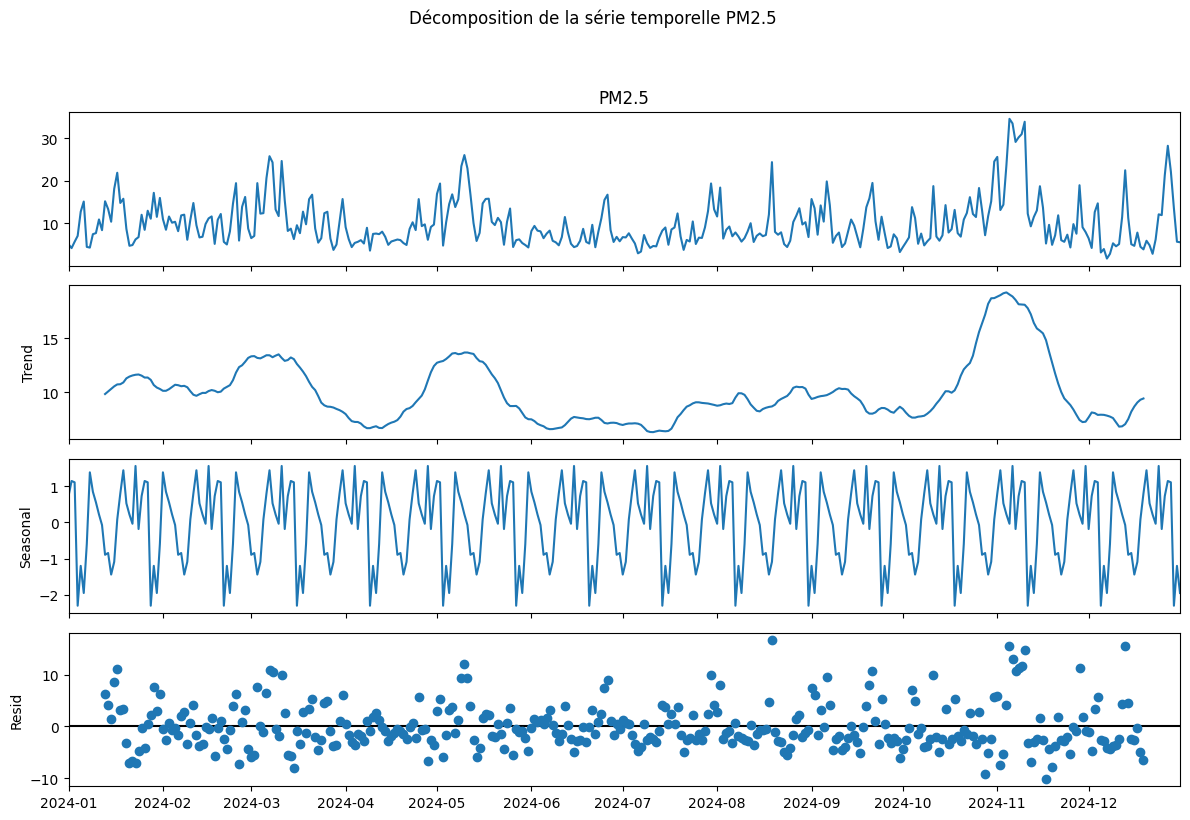

In [33]:
decomposition_pm25 = seasonal_decompose(df['PM2.5'], model='additive', period=24)
fig_pm25 = decomposition_pm25.plot()
fig_pm25.set_size_inches(12, 8)
fig_pm25.suptitle('Décomposition de la série temporelle PM2.5 ', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

Conclusion: 

### b) Test Stationnarité (Différenciation)

Une série est **stationnaire** si sa moyenne, sa variance et l'auto-corrélation ne changent pas au cours du temps.

Pour rendre la série stationnaire, nous utiliserons le **test de Dickey-Fuller Augmenté (ADF)**

In [46]:
from statsmodels.tsa.stattools import adfuller

In [49]:
adfuller(df['AQI'])

(np.float64(-5.117451789096368),
 np.float64(1.2929374994079003e-05),
 6,
 359,
 {'1%': np.float64(-3.4486972813047574),
  '5%': np.float64(-2.8696246923288418),
  '10%': np.float64(-2.571077032068342)},
 np.float64(2235.593647000729))

In [ ]:
print("Résultats du Test de Dickey-Fuller Augmenté pour AQI")
adf_aqi = adfuller(df['AQI'])

# Affichage des résultats
print(f'Statistique ADF: {adf_aqi[0]: .4f}')
print(f'P-value : {adf_aqi[1]: .4f}')

print('Valeurs critiques : ')
for key, value in adf_aqi[4].items():
    print(f' {key} : {value: .4f}')


# Interprétation de p-value
if adf_aqi[1] <=0.05:
    print("\nConclusion : La P-value est <= 0.05. Nous rejetons l'hypothèse nulle (H0).")
    print("La série AQI est probablement stationnaire (ou au moins n'a pas de racine unitaire).")
else:
    print("\nConclusion : La P-value est > 0.05. Nous ne pouvons pas rejeter l'hypothèse nulle (H0).")
    print("La série AQI n'est probablement PAS stationnaire.")


Résultats du Test de Dickey-Fuller Augmenté pour AQI
Statistique ADF: -5.1175
P-value :  0.0000129
Valeurs critiques : 
 1% : -3.4487
 5% : -2.8696
 10% : -2.5711

Conclusion : La P-value est <= 0.05. Nous rejetons l'hypothèse nulle (H0).
La série AQI est probablement stationnaire (ou au moins n'a pas de racine unitaire).


In [54]:
# Pour PM2.5
print("Résultats du Test de Dickey-Fuller Augmenté (ADF) pour le PM2.5 :")
adf_pm25 = adfuller(df['PM2.5'])

# Affichage des résultats du test
print(f'Statistique ADF : {adf_pm25[0]:.4f}')
print(f'P-value : {adf_pm25[1]:.4f}')
print('Valeurs critiques :')
for key, value in adf_pm25[4].items():
    print(f'   {key}: {value:.4f}')

# Interprétation de la P-value
if adf_pm25[1] <= 0.05:
    print("\nConclusion : La P-value est <= 0.05. Nous rejetons l'hypothèse nulle (H0).")
    print("La série PM2.5 est probablement stationnaire.")
else:
    print("\nConclusion : La P-value est > 0.05. Nous ne pouvons pas rejeter l'hypothèse nulle (H0).")
    print("La série PM2.5 n'est probablement PAS stationnaire.")


Résultats du Test de Dickey-Fuller Augmenté (ADF) pour le PM2.5 :
Statistique ADF : -5.3699
P-value : 0.0000
Valeurs critiques :
   1%: -3.4486
   5%: -2.8696
   10%: -2.5711

Conclusion : La P-value est <= 0.05. Nous rejetons l'hypothèse nulle (H0).
La série PM2.5 est probablement stationnaire.


Conclusion :  Les deux séries sont stationnaires par le test de Dickey-Fuller Augmenté

### c) Identification des ordres :  p, d et q

Nous allons réaliser les fonctions Autocorrélation (ACF) et Autocorrélation partielle (PACF)

In [55]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

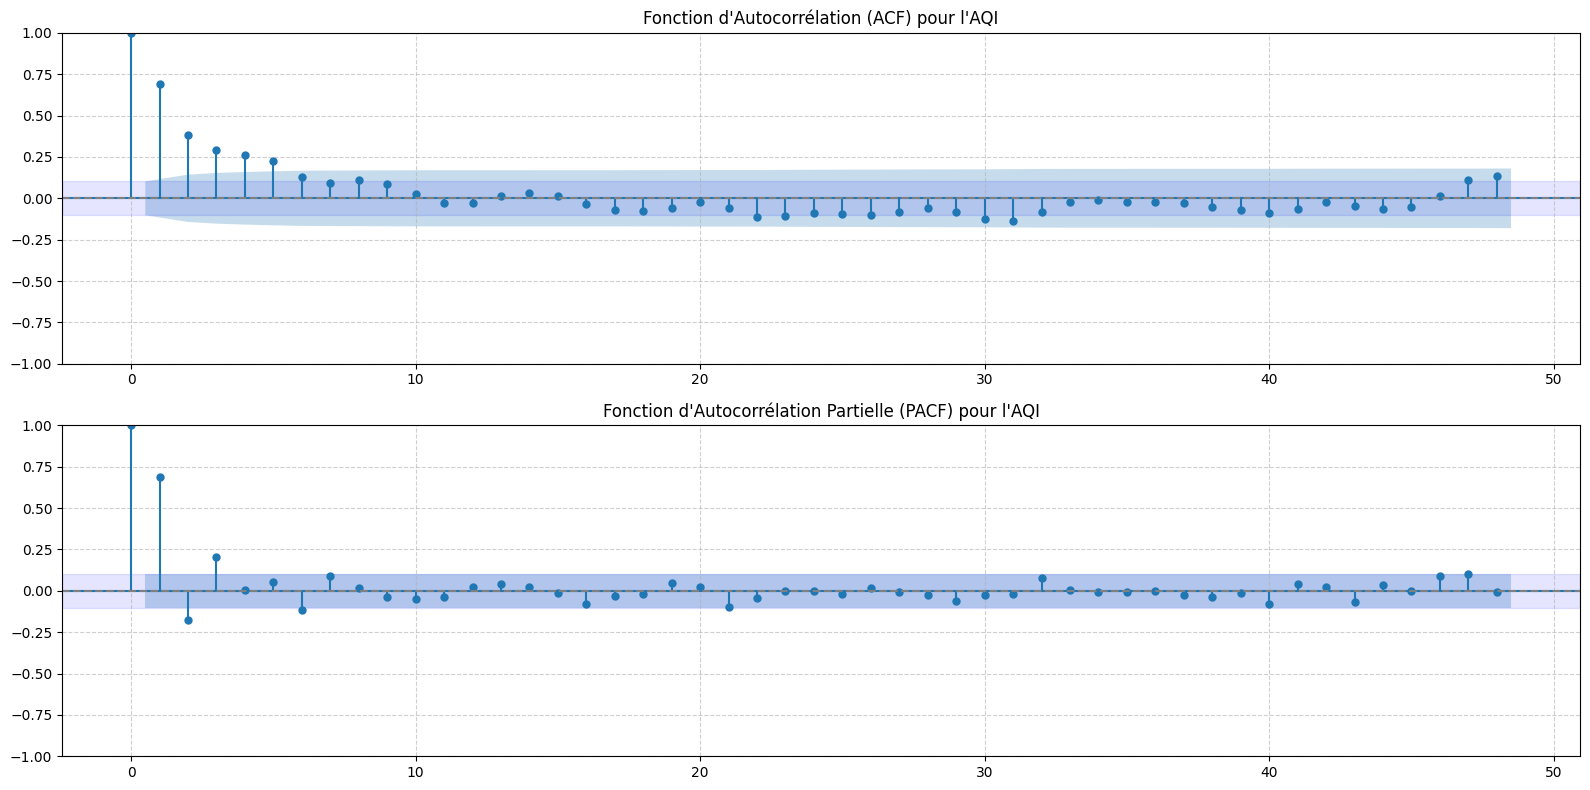

In [56]:
plt.figure(figsize=(16, 8))

# Plot ACF pour AQI
plt.subplot(2, 1, 1) # 2 lignes, 1 colonne, premier graphique
plot_acf(df['AQI'], lags=48, ax=plt.gca(), title='Fonction d\'Autocorrélation (ACF) pour l\'AQI') # Regarder 2 cycles de 24h
plt.axhline(y=0, linestyle='--', color='gray') # Ligne de référence à 0
plt.axhspan(ymin=-1.96/len(df['AQI'])**0.5, ymax=1.96/len(df['AQI'])**0.5, color='blue', alpha=0.1) # Bandes de confiance à 95%
plt.grid(True, linestyle='--', alpha=0.6)

# Plot PACF pour AQI
plt.subplot(2, 1, 2) # 2 lignes, 1 colonne, deuxième graphique
plot_pacf(df['AQI'], lags=48, ax=plt.gca(), title='Fonction d\'Autocorrélation Partielle (PACF) pour l\'AQI')
plt.axhline(y=0, linestyle='--', color='gray') # Ligne de référence à 0
plt.axhspan(ymin=-1.96/len(df['AQI'])**0.5, ymax=1.96/len(df['AQI'])**0.5, color='blue', alpha=0.1) # Bandes de confiance à 95%
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

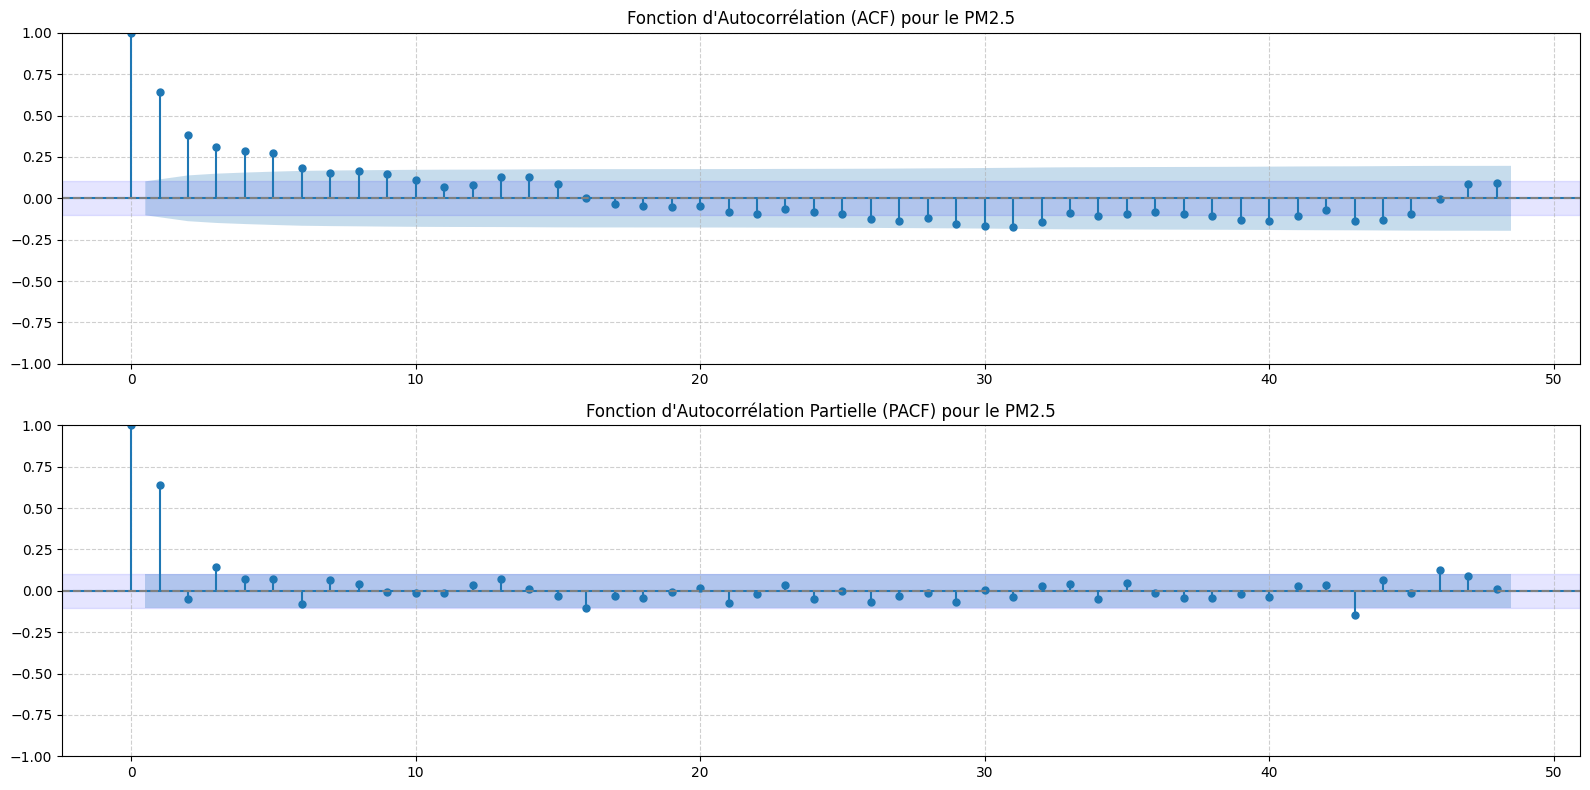

In [57]:
# Pour PM2.5
plt.figure(figsize=(16, 8))

# Plot ACF pour PM2.5
plt.subplot(2, 1, 1)
plot_acf(df['PM2.5'], lags=48, ax=plt.gca(), title='Fonction d\'Autocorrélation (ACF) pour le PM2.5')
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhspan(ymin=-1.96/len(df['PM2.5'])**0.5, ymax=1.96/len(df['PM2.5'])**0.5, color='blue', alpha=0.1)
plt.grid(True, linestyle='--', alpha=0.6)

# Plot PACF pour PM2.5
plt.subplot(2, 1, 2)
plot_pacf(df['PM2.5'], lags=48, ax=plt.gca(), title='Fonction d\'Autocorrélation Partielle (PACF) pour le PM2.5')
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhspan(ymin=-1.96/len(df['PM2.5'])**0.5, ymax=1.96/len(df['PM2.5'])**0.5, color='blue', alpha=0.1)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

## Partie 2: Estimation du modèle

### Cas 1:  SARIMA sans différenciation (1, 0, 1)24 où p=1, d=0 et q=1

In [64]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox

In [60]:
# Diviser df en df_train et df_test

size_train = int(len(df) * 0.8)
df_train = df['AQI'][:size_train]
df_test = df['AQI'][size_train:]


Tentative d'ajustement du modèle SARIMA(1, 0, 1)(1, 0, 1, 24) pour l'AQI...


e:\Formation_Data_Analystic\Statistique\sda_stat_AQI\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
e:\Formation_Data_Analystic\Statistique\sda_stat_AQI\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)



Résumé du modèle SARIMA pour l'AQI :
                                     SARIMAX Results                                      
Dep. Variable:                                AQI   No. Observations:                  292
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 24)   Log Likelihood                -843.010
Date:                            Sun, 13 Jul 2025   AIC                           1696.020
Time:                                    01:04:08   BIC                           1713.937
Sample:                                01-01-2024   HQIC                          1703.218
                                     - 10-18-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9862      0.009    110.791      0.000       0.969       1.0

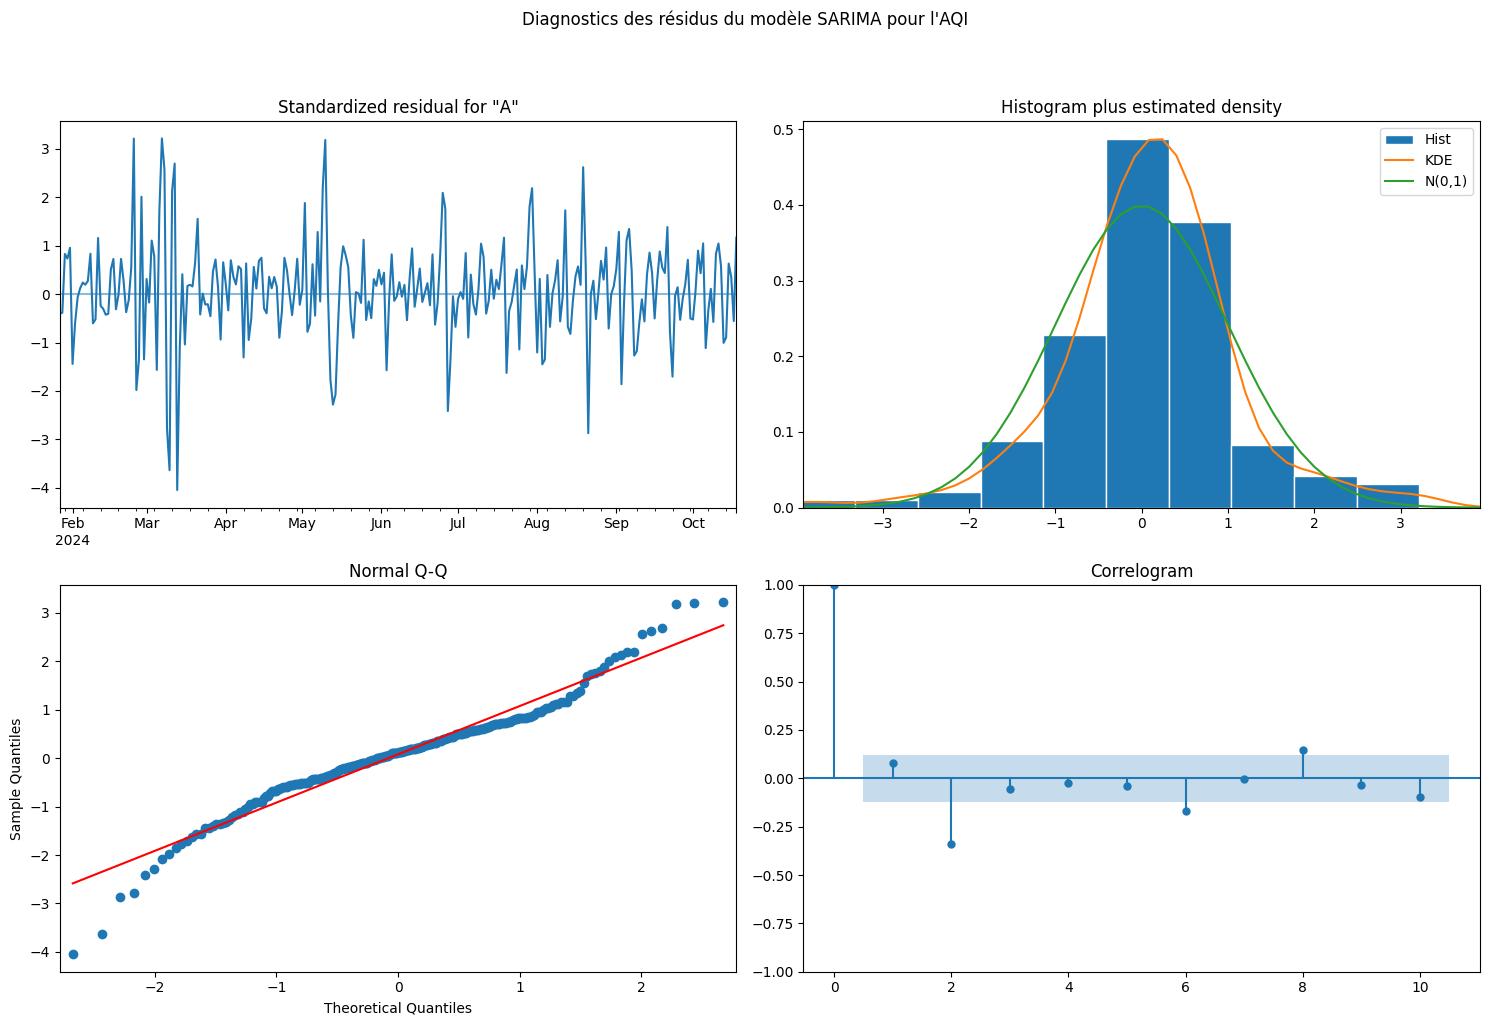


Test de Ljung-Box sur les résidus (Hypothèse Nulle : les résidus sont indépendants) :
      lb_stat  lb_pvalue
24  69.029779   0.000003
48  83.230928   0.001211


In [ ]:
# Modèle SARIMA pour AQI

order = (1, 0, 1)
seasonal_order = (1, 0, 1, 24)
print(f"\nTentative d'ajustement du modèle SARIMA{order}{seasonal_order} pour l'AQI...")
try:
    model_aqi = SARIMAX(df_train,
                        order=order,
                        seasonal_order=seasonal_order,
                        enforce_stationarity=False, 
                        enforce_invertibility=False)
    results_aqi = model_aqi.fit(disp=False) # disp=False pour éviter l'affichage de chaque itération

    print("\nRésumé du modèle SARIMA pour l'AQI :")
    print(results_aqi.summary())

    # --- 6.2 Analyse des résidus du modèle ---
    print("\nAnalyse des résidus :")
    results_aqi.plot_diagnostics(figsize=(15, 10))
    plt.suptitle('Diagnostics des résidus du modèle SARIMA pour AQI', y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

    # Test de Ljung-Box sur les résidus pour l'autocorrélation
    print("\nTest de Ljung-Box sur les résidus (Hypothèse Nulle : les résidus sont indépendants) :")
    ljung_box = acorr_ljungbox(results_aqi.resid, lags=[24, 48], return_df=True)
    print(ljung_box)

except Exception as e:
    print(f"Une erreur est survenue lors de l'ajustement du modèle : {e}")
    print("Cela peut arriver si les ordres ne sont pas optimaux ou si les données sont trop courtes pour une période saisonnière.")
    print("Essayez de revoir les ordres ou d'augmenter la taille des données si possible.")



### ACF et PACF

L'ACF (Autocorrelation Function) et la PACF (Partial Autocorrelation Function) sont deux outils essentiels en analyse de séries temporelles. Elles permettent de comprendre les dépendances temporelles dans une série de données.

#### ACF (Autocorrelation Function)

L'ACF mesure la corrélation entre une séquence et elle-même à différentes périodes de temps. Autrement dit, elle permet d'évaluer la similitude entre les observations en fonction du décalage de temps entre elles.

**Pour un décalage 'k', l'ACF mesure la corrélation entre la série temporelle et elle-même décalée de 'k' périodes.**

Par exemple, **une ACF de 0,9 à un décalage de 2 signifie que les données sont très similaires à elles-mêmes il y a deux périodes de temps**.

#### PACF (Partial Autocorrelation Function)

La PACF est une corrélation qui exclut l'effet des termes intermédiaires. C'est-à-dire qu'elle est une mesure de la corrélation entre des observations à un certain intervalle, en tenant compte des valeurs à des intervalles plus courts.

Pour un décalage 'k', **la PACF est la corrélation entre la série temporelle et elle-même décalée de 'k' périodes, mais après avoir soustrait les effets des décalages 1 à 'k-1'**.

Par exemple, une PACF de 0,5 à un décalage de 3 signifie que les données sont moyennement similaires à elles-mêmes il y a trois périodes de temps, après avoir pris en compte les décalages 1 et 2.

#### Utilisations

Les graphiques ACF et PACF sont couramment utilisés pour aider à choisir les paramètres d'un modèle ARIMA en analyse de séries temporelles. Par exemple, **le graphique ACF peut être utilisé pour identifier le terme MA (moyenne mobile)** du modèle, tandis que le graphique **PACF peut aider à identifier le terme AR (auto-régressif).**


In [ ]:
# Analyse de la stationnarité de la variable
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

# Effectuer le test de Dickey-Fuller augmenté
result = adfuller(df)

# Formater les résultats dans un tableau
table = [
    ['Valeur de test', result[0]],
    ['P-valeur', result[1]],
    ['Conclusion', 'La série est stationnaire' if result[1] < 0.05 else 'La série est non stationnaire']
]

# Afficher les résultats sous forme de tableau
print(tabulate(table, headers=['Métrique', 'Valeur'], tablefmt='github'))

| Métrique       | Valeur                        |
|----------------|-------------------------------|
| Valeur de test | 0.8153688792060371            |
| P-valeur       | 0.9918802434376408            |
| Conclusion     | La série est non stationnaire |


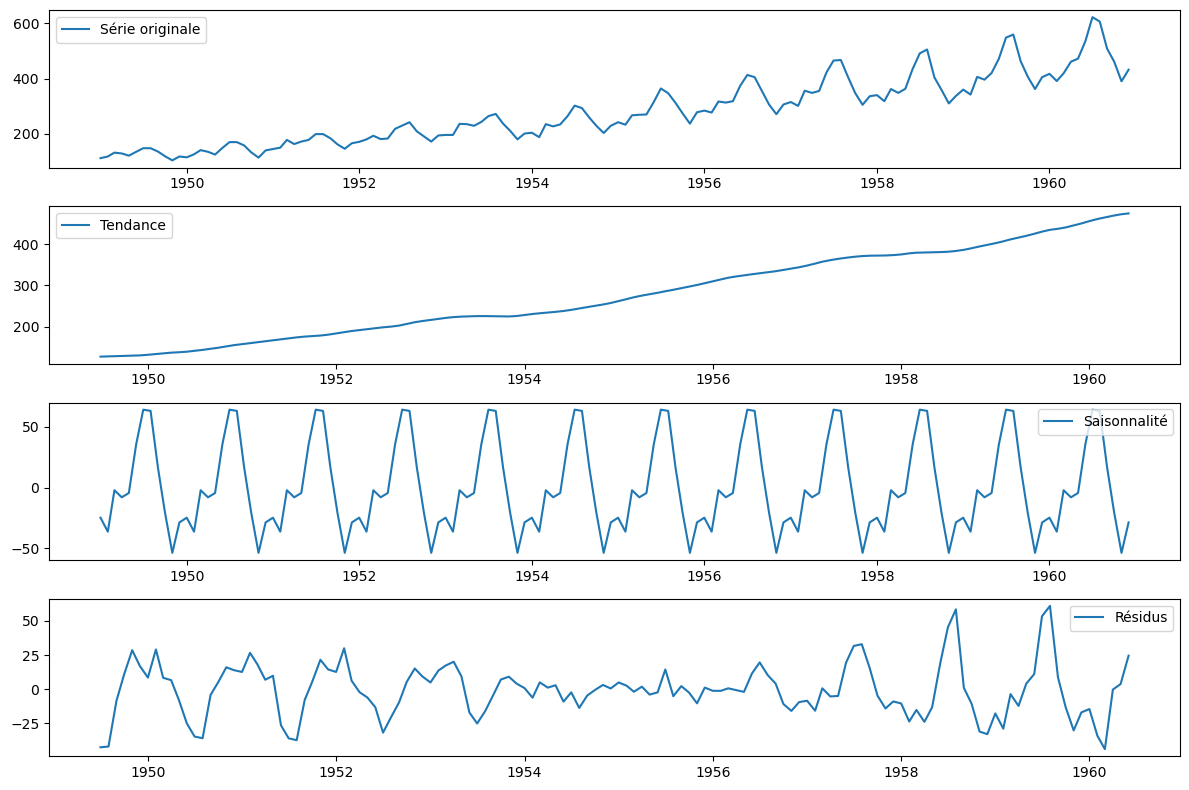

In [ ]:
# Effectuer la décomposition saisonnière
decomposition = seasonal_decompose(df['Passengers'], model='additive')

# Extraire les composantes de la décomposition
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Afficher les composantes de la décomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df['Passengers'], label='Série originale')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Tendance')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Saisonnalité')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Résidus')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

## Différentciation (Stationnarisation)

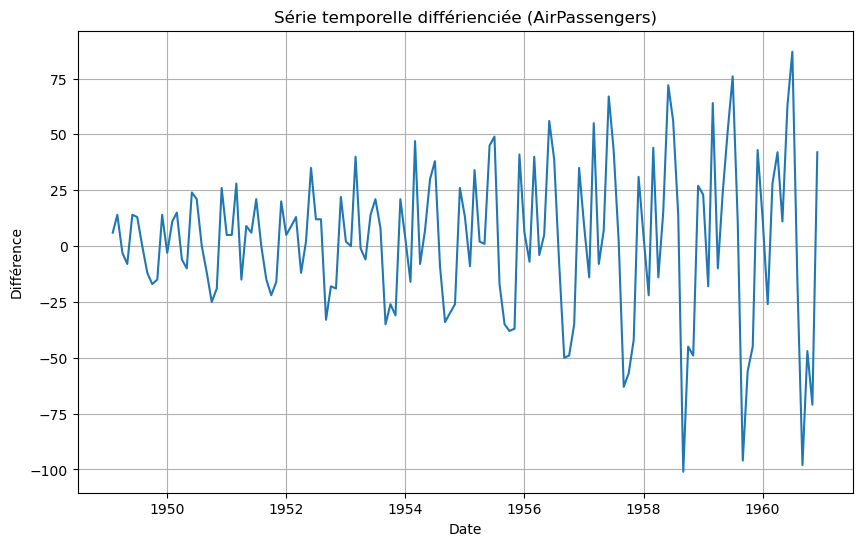

In [ ]:

# Différenciation pour rendre la série stationnaire
differenced = df['Passengers'].diff().dropna()

# Afficher la série différienciée
plt.figure(figsize=(10, 6))
plt.plot(differenced)
plt.title('Série temporelle différienciée (AirPassengers)')
plt.xlabel('Date')
plt.ylabel('Différence')
plt.grid(True)
plt.show()


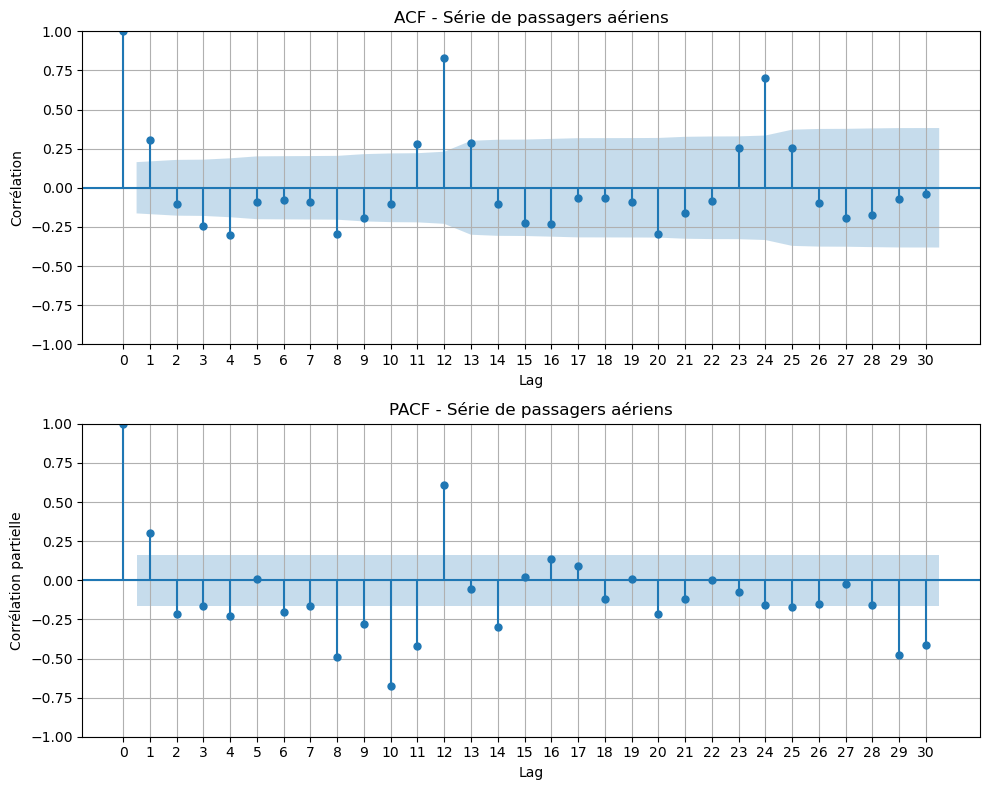

In [15]:
# Créer les subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Tracer l'ACF
plot_acf(differenced, lags=30, zero=True, ax=ax1)
ax1.set_title('ACF - Série de passagers aériens')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Corrélation')
ax1.grid(True)

# Ajuster les graduations sur l'axe x pour l'ACF
ax1.set_xticks(np.arange(0, 31, 1))

# Tracer le PACF
plot_pacf(differenced, lags=30, zero=True, ax=ax2)
ax2.set_title('PACF - Série de passagers aériens')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Corrélation partielle')
ax2.grid(True)

# Ajuster les graduations sur l'axe x pour le PACF
ax2.set_xticks(np.arange(0, 31, 1))

# Ajuster les subplots
plt.tight_layout()

# Afficher le graphique
plt.show()

In [ ]:
# Analyse de la stationnarité de la variable
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

# Effectuer le test de Dickey-Fuller augmenté
result = adfuller(differenced)

# Formater les résultats dans un tableau
table = [
    ['Valeur de test', result[0]],
    ['P-valeur', result[1]],
    ['Conclusion', 'La série est stationnaire' if result[1] < 0.05 else 'La série est non stationnaire']
]

# Afficher les résultats sous forme de tableau
print(tabulate(table, headers=['Métrique', 'Valeur'], tablefmt='github'))

| Métrique       | Valeur                        |
|----------------|-------------------------------|
| Valeur de test | -2.829266824169981            |
| P-valeur       | 0.05421329028382792           |
| Conclusion     | La série est non stationnaire |


## Identification de l'ordre p,d,q

In [ ]:
p=2
d=1
q=1,3

In [ ]:
# Séparer les données en ensemble d'entraînement et ensemble de test
train_data = df['Passengers'][:-15]
test_data = df['Passengers'][-15:]

# Estimation du modèle

In [18]:
from statsmodels.tsa.arima.model import ARIMA

# Créer un modèle ARIMA(2,1,1)
model = ARIMA(train_data, order=(2,1,1))

# Ajuster le modèle
model_fit = model.fit()

# Afficher le résumé du modèle
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  129
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -604.753
Date:                Sat, 10 Jun 2023   AIC                           1217.507
Time:                        16:35:20   BIC                           1228.915
Sample:                    01-01-1949   HQIC                          1222.142
                         - 09-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0810      0.105     10.263      0.000       0.875       1.287
ar.L2         -0.4722      0.102     -4.641      0.000      -0.672      -0.273
ma.L1         -0.8445      0.094     -8.981      0.0

/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


# Vérification du modèle



Après avoir ajusté un modèle ARIMA, il est crucial de vérifier les résidus du modèle pour s'assurer de la qualité de l'ajustement. Les résidus sont la différence entre les valeurs observées et les valeurs prédites par le modèle. Si le modèle est bien ajusté, les résidus doivent se comporter comme un bruit blanc, c'est-à-dire être une série temporelle aléatoire à distribution normale, avec une moyenne de zéro et sans autocorrélation. Voici quelques points clés à vérifier :

## Test de Ljung-Box

Le test de Ljung-Box teste l'absence d'autocorrélation dans les résidus. Nous voulons que les résidus soient indépendants les uns des autres. Une faible valeur p (p < 0,05) indique une preuve d'autocorrélation.

## Hétéroscédasticité

L'hétéroscédasticité se réfère à la situation dans laquelle la variabilité de l'erreur de prédiction (ou résidu) n'est pas constante à travers toutes les observations. Nous préférons avoir une erreur de prédiction constante, donc la vérification de l'hétéroscédasticité est importante. Un bon modèle devrait présenter une homoscédasticité, c'est-à-dire une variance constante des résidus.

## Normalité

L'aspect de normalité fait référence à la distribution des résidus. Dans un bon modèle, nous attendons que les résidus suivent une distribution normale. Pour vérifier cela, nous pouvons utiliser un graphique Q-Q ou effectuer un test statistique, comme le test de Shapiro-Wilk, pour vérifier la normalité.

## Graphiques des résidus

En plus des tests statistiques, il est utile de tracer les résidus au fil du temps, ainsi que leur autocorrélation (ACF et PACF), pour vérifier visuellement les suppositions précédentes. Dans un modèle bien ajusté, les résidus devraient ressembler à un bruit blanc lorsqu'ils sont tracés dans le temps, et l'ACF et le PACF devraient montrer peu ou pas de corrélation significative.

Rappelez-vous, aucun modèle n'est parfait, et tous ces tests et graphiques sont des outils pour vous aider à comprendre si votre modèle est "suffisamment bon" pour répondre à vos besoins spécifiques.


<Figure size 1000x500 with 0 Axes>

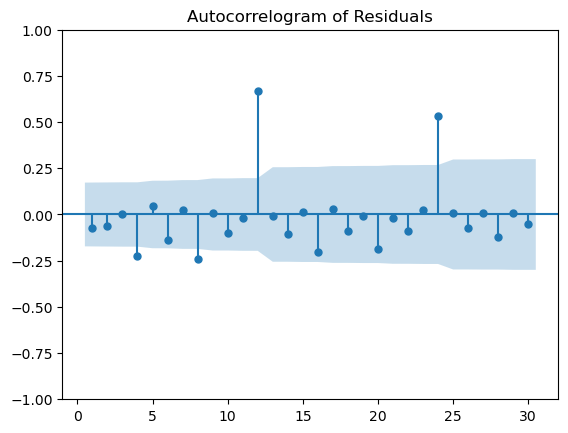

<Figure size 1000x500 with 0 Axes>

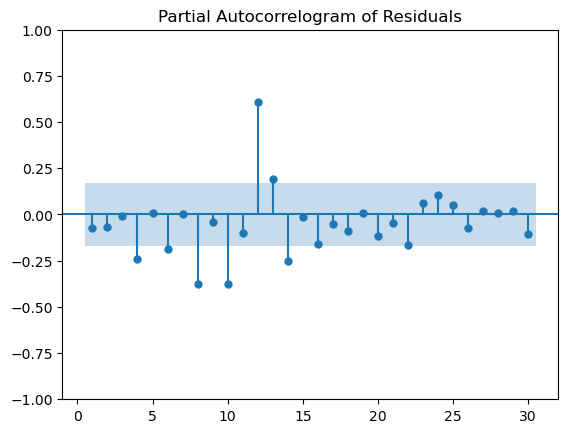

In [19]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer les résidus
residuals = model_fit.resid

# Tracer l'ACF des résidus
plt.figure(figsize=(10, 5))
plot_acf(residuals, lags=30, zero=False)
plt.title("Autocorrelogram of Residuals")
plt.show()

# Tracer la PACF des résidus
plt.figure(figsize=(10, 5))
plot_pacf(residuals, lags=30, zero=False)
plt.title("Partial Autocorrelogram of Residuals")
plt.show()


# Prédiction

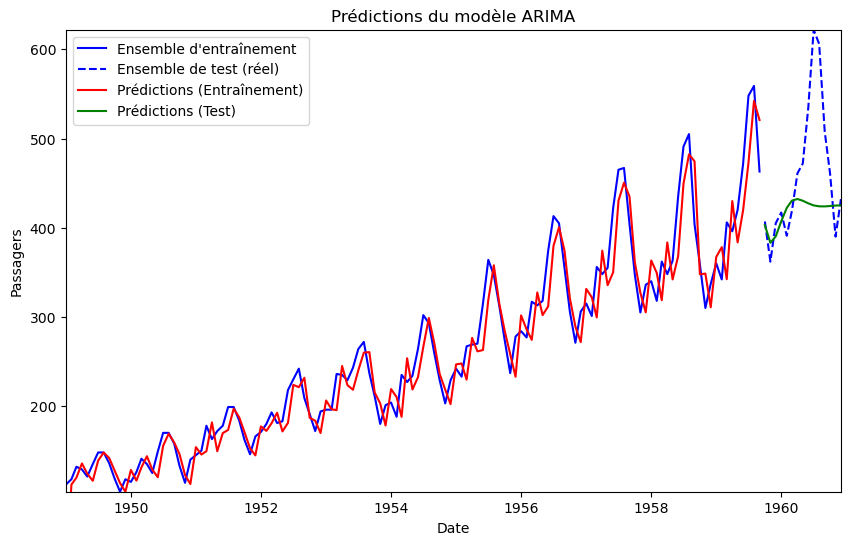

In [20]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Prédictions sur l'ensemble d'entraînement
train_predictions = model_fit.predict(start=train_data.index[0], end=train_data.index[-1])

# Prédictions sur l'ensemble de test
test_predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# Prédictions sur l'ensemble d'entraînement
train_predictions = model_fit.predict(start=train_data.index[0], end=train_data.index[-1])

# Prédictions sur l'ensemble de test
test_predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# Tracer les prédictions et les données réelles avec les courbes collées
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data.values, label='Ensemble d\'entraînement', color='blue')
plt.plot(test_data.index, test_data.values, label='Ensemble de test (réel)', color='blue', linestyle='--')
plt.plot(train_predictions.index, train_predictions, label='Prédictions (Entraînement)', color='red')
plt.plot(test_predictions.index, test_predictions, label='Prédictions (Test)', color='green')

# Définir les limites des axes x et y pour une continuité visuelle
plt.xlim(train_data.index[0], test_data.index[-1])
plt.ylim(min(train_data.min(), test_data.min()), max(train_data.max(), test_data.max()))

plt.xlabel('Date')
plt.ylabel('Passagers')
plt.title('Prédictions du modèle ARIMA')
plt.legend()
plt.show()

In [ ]:
# Mesures de performance sur l'ensemble d'entraînement
train_mae = mean_absolute_error(train_data, train_predictions)
train_mse = mean_squared_error(train_data, train_predictions)
train_rmse = mean_squared_error(train_data, train_predictions, squared=False)
train_r2 = r2_score(train_data, train_predictions)

# Mesures de performance sur l'ensemble de test
test_mae = mean_absolute_error(test_data, test_predictions)
test_mse = mean_squared_error(test_data, test_predictions)
test_rmse = mean_squared_error(test_data, test_predictions, squared=False)
test_r2 = r2_score(test_data, test_predictions)

# Créer un DataFrame pour afficher les mesures de performance
performance_df = pd.DataFrame({
    'Métrique': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Ensemble d\'entraînement': [train_mae, train_mse, train_rmse, train_r2],
    'Ensemble de test': [test_mae, test_mse, test_rmse, test_r2]
})

print(performance_df)

  Métrique  Ensemble d'entraînement  Ensemble de test
0      MAE                22.183944         54.144213
1      MSE               830.835014       6510.318943
2     RMSE                28.824209         80.686547
3       R²                 0.925421         -0.148361


# Modèle automatique

In [ ]:
#!pip install pmdarima

import pmdarima as pm

# Séparer les données en ensemble d'entraînement et ensemble de test
train_data = df['Passengers'][:-15]
test_data = df['Passengers'][-15:]

# Utiliser auto_arima pour trouver le meilleur modèle ARIMA
model = pm.auto_arima(train_data)

print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  129
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -589.217
Date:                Sat, 10 Jun 2023   AIC                           1190.435
Time:                        16:41:44   BIC                           1207.547
Sample:                    01-01-1949   HQIC                          1197.388
                         - 09-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6605      0.126      5.239      0.000       0.413       0.908
ar.L1          1.6235      0.041     39.770      0.000       1.543       1.703
ar.L2         -0.8951      0.041    -21.896      0.0

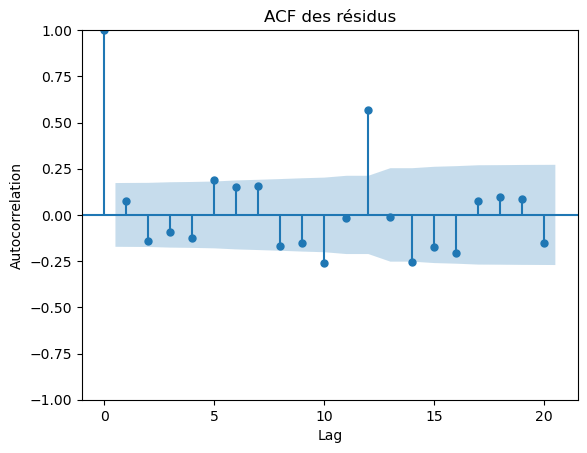

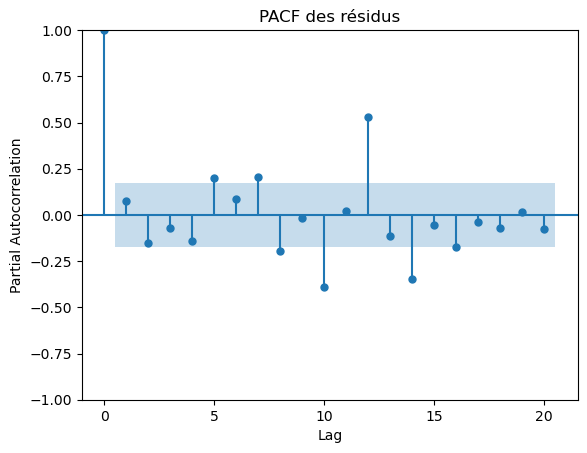

In [23]:
# Ajuster le modèle aux données
model.fit(train_data)
# Obtenir les résidus du modèle
residuals = model.resid()

# Tracer la fonction d'autocorrélation (ACF) des résidus
plot_acf(residuals, lags=20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF des résidus')
plt.show()

# Tracer la fonction d'autocorrélation partielle (PACF) des résidus
plot_pacf(residuals, lags=20)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('PACF des résidus')
plt.show()

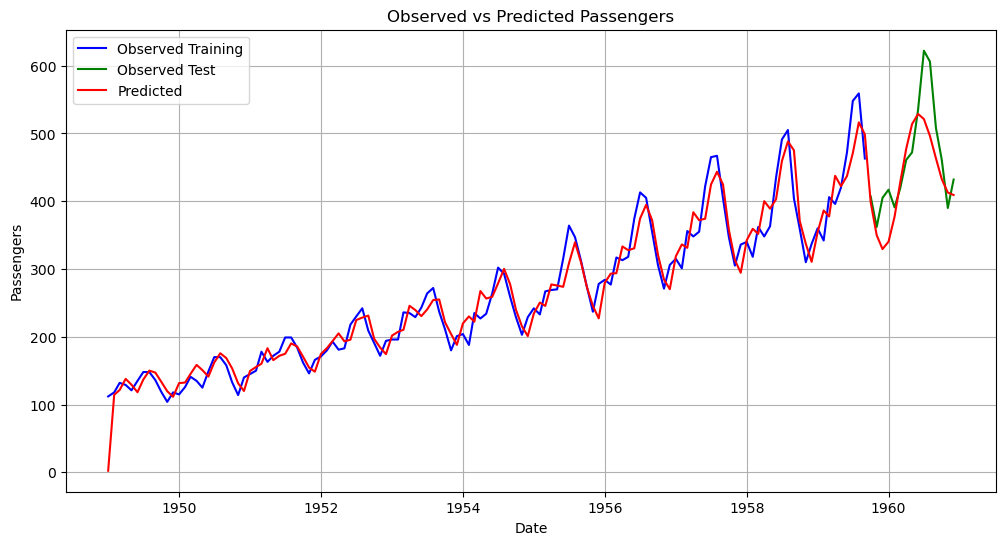

In [24]:

# Faire des prédictions sur l'ensemble d'entraînement
train_pred, train_confint = model.predict_in_sample(return_conf_int=True)

# Faire des prédictions sur l'ensemble de test
n_periods = len(test_data)
predicted, confint = model.predict(n_periods=n_periods, return_conf_int=True)

# Concaténer les prédictions pour l'ensemble d'entraînement et de test
all_predictions = pd.concat([pd.Series(train_pred, index=train_data.index), 
                             pd.Series(predicted, index=test_data.index)], 
                            axis=0)

# Tracer les valeurs réelles et les prédictions pour l'ensemble d'entraînement et de test
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Observed Training', color='blue')
plt.plot(test_data, label='Observed Test', color='green')
plt.plot(all_predictions, label='Predicted', color='red')

plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Observed vs Predicted Passengers')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Calculer les mesures de performance sur l'ensemble d'entraînement
train_mae = mean_absolute_error(train_data, train_pred)
train_mse = mean_squared_error(train_data, train_pred)
train_rmse = mean_squared_error(train_data, train_pred, squared=False)
train_r2 = r2_score(train_data, train_pred)

# Calculer les mesures de performance sur l'ensemble de test
test_mae = mean_absolute_error(test_data, predicted)
test_mse = mean_squared_error(test_data, predicted)
test_rmse = mean_squared_error(test_data, predicted, squared=False)
test_r2 = r2_score(test_data, predicted)

# Créer un DataFrame pour afficher les mesures de performance
performance_df = pd.DataFrame({
    'Métrique': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Ensemble d\'entraînement': [train_mae, train_mse, train_rmse, train_r2],
    'Ensemble de test': [test_mae, test_mse, test_rmse, test_r2]
})

print(performance_df)




  Métrique  Ensemble d'entraînement  Ensemble de test
0      MAE                19.581814         39.311028
1      MSE               656.693909       2679.985252
2     RMSE                25.626040         51.768574
3       R²                 0.941052          0.527275


# Quiz

### Quiz sur le modèle ARIMA en Python

**Question 1: Qu'est-ce que ARIMA signifie en termes de modélisation de séries chronologiques?**


a) Autoregressive Integrated Moving Average

b) Auto Regression Inverse Moving Average

c) Adaptive Recursive Integrated Moving Average

d) All-inclusive Regression for Integrated Moving Averages


**Question 2: Comment peut-on sélectionner les ordres p, d, q pour un modèle ARIMA ?**

a) Par la méthode de Box-Jenkins

b) En utilisant la méthode de l'erreur absolue moyenne

c) Par le calcul des coefficients de corrélation

d) En utilisant uniquement les ordres p et q comme paramètres


**Question 3: Comment évalue-t-on les performances d'un modèle ARIMA ?**

a) En utilisant le coefficient de corrélation

b) En calculant l'erreur absolue moyenne (MAE)

c) En comparant les prédictions avec les données réelles

d) Toutes les réponses ci-dessus


**Question 4: Que signifie un bruit blanc dans les résidus d'un modèle ARIMA ?**


a) Les résidus sont non autocorrélé, homoscédastique et normalement distribuée

b) Les résidus ont une autocorrélation significative aux lags non nuls

c) Les résidus ont une variance croissante avec le temps